### The store where a android user gets every app he needs is
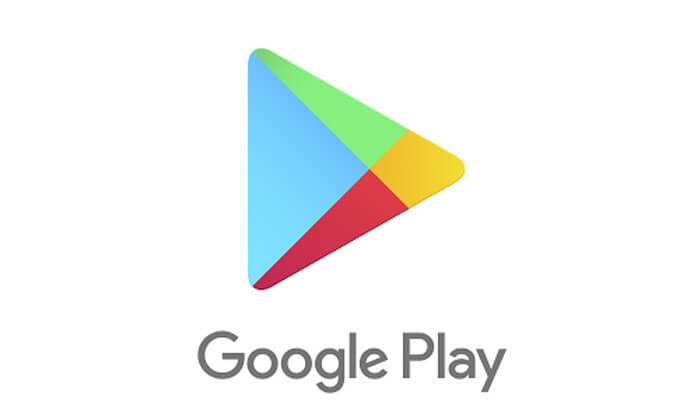


### Source of DataSet
https://www.kaggle.com/lava18/google-play-store-apps

### **DATA**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv('/content/googleplaystore.csv')

In [ ]:
data.describe()

,Rating,Reviews,Size
count,9366.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,35.773441
std,0.515219,2.927761e+06,90.861795
min,1.000000,0.000000e+00,1.000000
25%,4.000000,3.800000e+01,6.800000
50%,4.300000,2.094000e+03,20.000000
75%,4.500000,5.477550e+04,29.000000
max,5.000000,7.815831e+07,1020.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android_Ver     10840 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [ ]:
data.shape

(10841, 13)

In [ ]:
data.isnull().sum()     #sum of null values in each colomn

App                  1
Category             1
Rating            1475
Reviews              1
Size                 1
Installs             1
Type                 2
Price                1
Content Rating       1
Genres               1
Last Updated         1
Current Ver          9
Android_Ver          1
dtype: int64

### **GRAPHS**

**Using WordCloud to display the columns in the row**

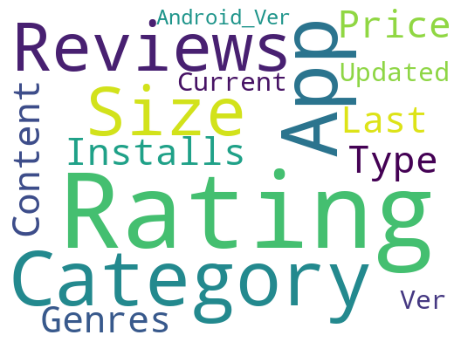

In [ ]:
plt.subplots(figsize=(8,8))     #setting the size of the word cloud
wordcloud = WordCloud(
                          background_color='white',     #setting teh parameters for word cloud
                          width=512,
                          height=384
                         ).generate(" ".join(data))
plt.imshow(wordcloud)     #it will show the word cloud on the screen with the specified parameters
plt.axis('off')           #It will hide the axis and the borders
plt.savefig('graph.png')

plt.show()

**Pie chart for the Android version supported by the app**

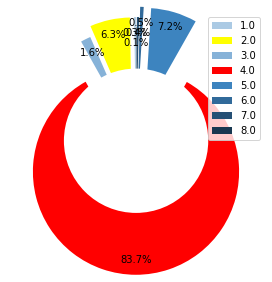

In [ ]:
_1=0
_2=0
_3=0
_4=0
_5=0
_6=0
_7=0
_8=0
And_ver=data["Android_Ver"]
for i in range(0,4000):
  if And_ver[i].startswith('1') == True:
    _1=_1+1
  elif And_ver[i].startswith('2') == True:        #In this for loop we are countting the apps and their android version
    _2=_2+1
  elif And_ver[i].startswith('3') == True:
    _3=_3+1
  elif And_ver[i].startswith('4') == True:
    _4=_4+1
  elif And_ver[i].startswith('5') == True:
    _5=_5+1
  elif And_ver[i].startswith('6') == True:
    _6=_6+1
  elif And_ver[i].startswith('7') == True:
    _7=_7+1
  elif And_ver[i].startswith('8') == True:
    _8=_8+1
labels=["1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0"]
sizes=[_1,_2,_3,_4,_5,_6,_7,_8]
explode = (0.2,0.2,0.1,0.3,0.3,0.3,0.2,0.1)
colors=["#abcae4","yellow","#86b2d8","red","#3d84bf","#316a9a","#255075","#193750"]
plt.pie(sizes,colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.legend(labels,loc="best")
plt.show()

**Showing the top categories in the dataset using bar graph**

In [ ]:
sns.set_style('darkgrid')               #this set the graph style to dark grids
matplotlib.rcParams['font.size'] = 14     #setting the font size
matplotlib.rcParams['figure.figsize'] = (9, 5)      #setting the figure size
matplotlib.rcParams['figure.facecolor'] = '#00000000'     #setting the face color as black

In [ ]:
y = data['Category'].value_counts().index     #takes the indexes of the counted values
x = data['Category'].value_counts()     #count each category and its repetence
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])     #the value of repetence is appended
    ysis.append(y[i])     #the indexes are appended

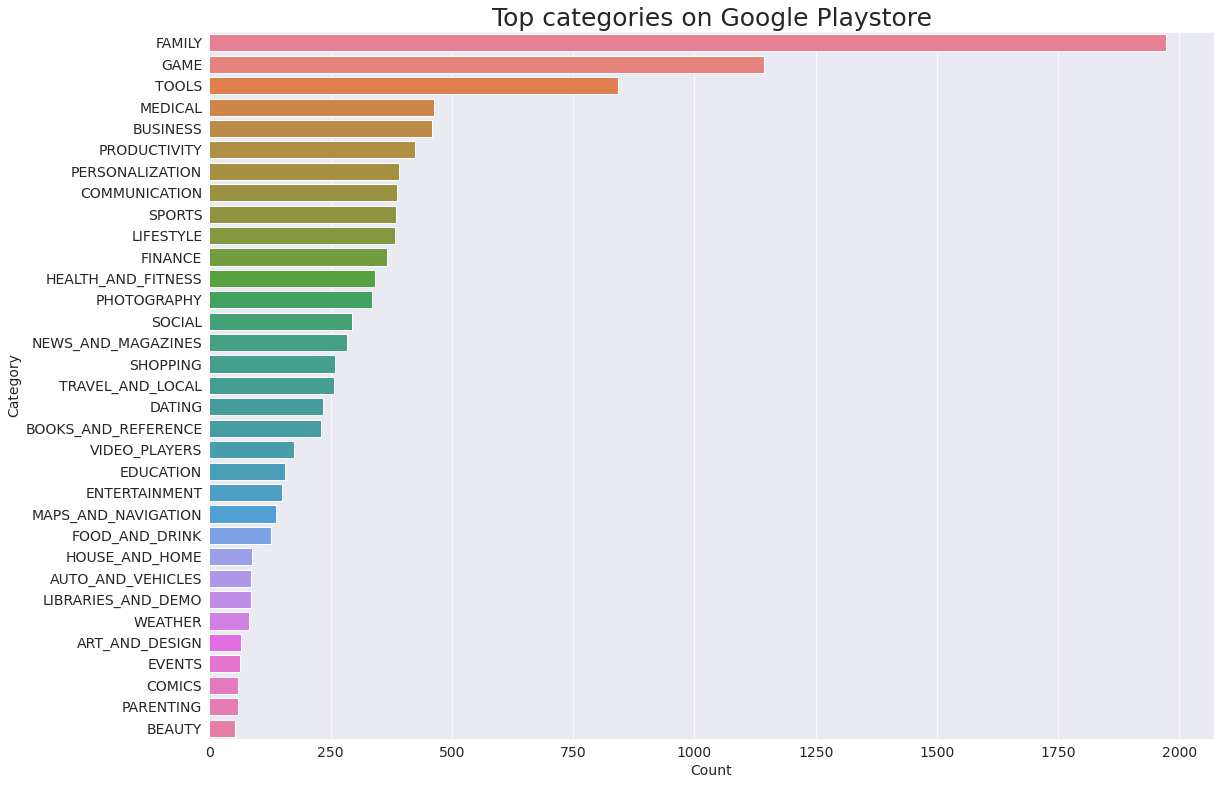

In [ ]:
plt.figure(figsize=(18,13))     #setting the graph size
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")      #in husl pallet i will cover all the colors in pallet
graph.set_title("Top categories on Google Playstore", fontsize = 25);

**Using Pie chart to show number of paid and free apps**

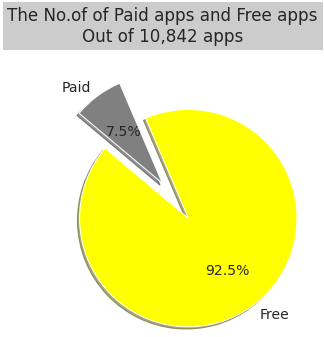

In [ ]:
#pie chart based on the app subsciption
type = data['Type']
free=0
paid=0
for i in range(10000):
  if type[i]=='Free':
    free=free+1
  elif type[i]=='Paid':     #counting the no.of paid apps and the free apps
    paid=paid+1
  else:
    continue
data2=[free,paid]
labels=['Free','Paid']
colors = ["yellow", "grey"]
explode = (0.4, 0)
plt.pie(data2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("The No.of of Paid apps and Free apps\n" + "Out of 10,842 apps", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

**Using Horizontal bar graph to show top 10 genres**

Total No.Of apps Listes :  10841



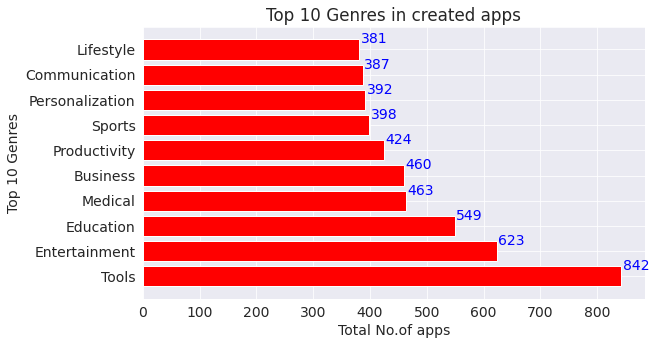

In [ ]:
#Bar chart of top 10 Genres
gen = data['Genres'].value_counts().head(10)      #counting the genres and taking the top 10 out of it
data1= ['Tools','Entertainment','Education','Medical','Business','Productivity','Sports','Personalization','Communication','Lifestyle']
x=data['Genres'].size
y= gen
fig,ax = plt.subplots()
ax.barh(data1,y,color='r')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue' )
plt.title("Top 10 Genres in created apps")
plt.xlabel('Total No.of apps')
plt.ylabel('Top 10 Genres')
print("Total No.Of apps Listes : ",x)
print("")
plt.show()

**Using Bar graph to show number of apps in category wise**

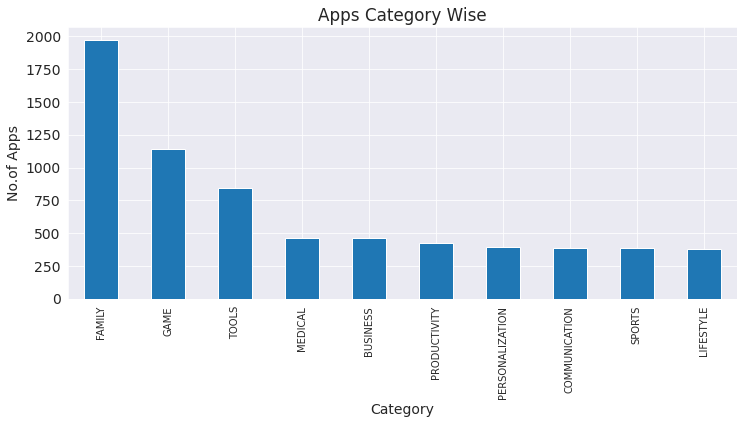

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Apps Category Wise")
plt.ylabel('No.of Apps')
plt.xlabel('Category')
plt.xticks(rotation=60,fontsize=10)
data['Category'].value_counts().head(10).plot(kind='bar')
plt.show()

**Bar graph to show distribution according to android version of the app**

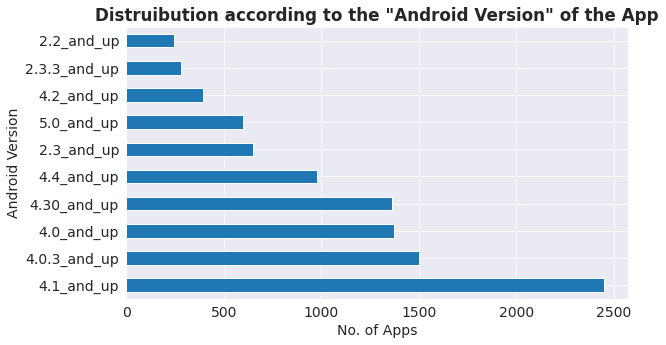

In [ ]:
plt.title('Distruibution according to the "Android Version" of the App',fontweight=900)
plt.ylabel('Android Version')
plt.xlabel('No. of Apps')
data['Android_Ver'].value_counts().head(10).plot(kind='barh')
plt.show()

**HeatMap to show Number of app rated in each age group**

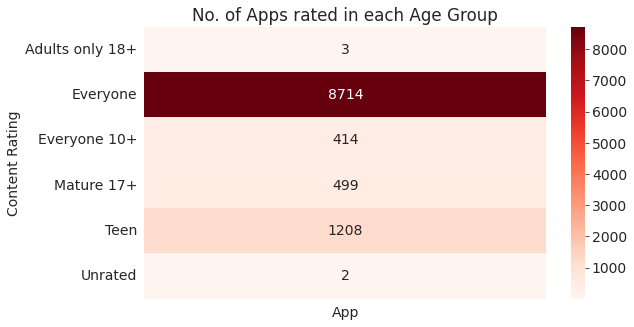

In [ ]:
plt.title("No. of Apps rated in each Age Group")
sns.heatmap(data.groupby('Content Rating')[['App']].count(),fmt="d", annot=True, cmap='Reds')

**Using plot to show number of apps in individual category**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



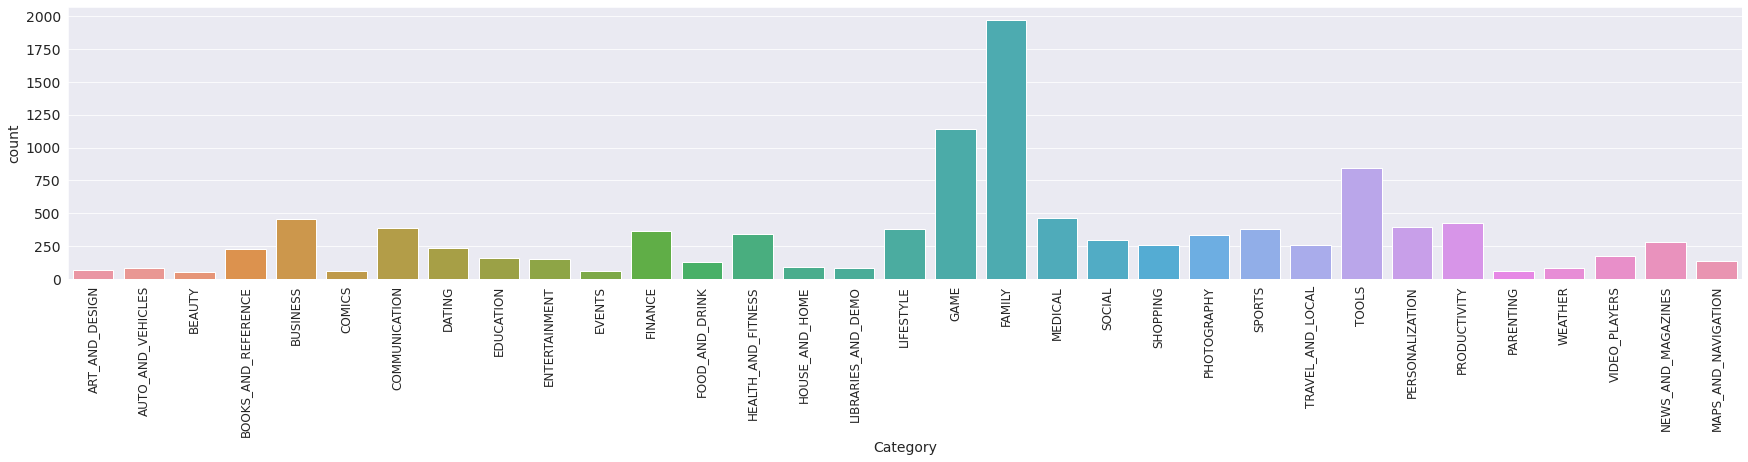

In [ ]:
plt.figure(figsize=(30,5))
gen = sns.countplot(data.Category)
gen.set_xticklabels(gen.get_xticklabels(), rotation=90, fontsize=12)
plt.show()

**Using plot to show paid apps in ascending order**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, '$0.99'),
 Text(0, 0, '$1.00'),
 Text(0, 0, '$1.04'),
 Text(0, 0, '$1.20'),
 Text(0, 0, '$1.26'),
 Text(0, 0, '$1.29'),
 Text(0, 0, '$1.49'),
 Text(0, 0, '$1.50'),
 Text(0, 0, '$1.59'),
 Text(0, 0, '$1.61'),
 Text(0, 0, '$1.70'),
 Text(0, 0, '$1.75'),
 Text(0, 0, '$1.76'),
 Text(0, 0, '$1.96'),
 Text(0, 0, '$1.97'),
 Text(0, 0, '$1.99'),
 Text(0, 0, '$10.00'),
 Text(0, 0, '$10.99'),
 Text(0, 0, '$109.99'),
 Text(0, 0, '$11.99'),
 Text(0, 0, '$12.99'),
 Text(0, 0, '$13.99'),
 Text(0, 0, '$14.00'),
 Text(0, 0, '$14.99'),
 Text(0, 0, '$15.46'),
 Text(0, 0, '$15.99'),
 Text(0, 0, '$154.99'),
 Text(0, 0, '$16.99'),
 Text(0, 0, '$17.99'),
 Text(0, 0, '$18.99'),
 Text(0, 0, '$19.40'),
 Text(0, 0, '$19.90'),
 Text(0, 0, '$19.99'),
 Text(0, 0, '$2.00'),
 Text(0, 0, '$2.49'),
 Text(0, 0, '$2.50'),
 Text(0, 0, '$2.56'),
 Text(0, 0, '$2.59'),
 Text(0, 0, '$2.60'),
 Text(0, 0, '$2.90'),
 Text(0, 0, '$2.95'),
 Text(0, 0, '$2.99'),
 Text(0, 0, '$200.00'),
 Text(0, 0, '$24.99'),
 Text(0, 0

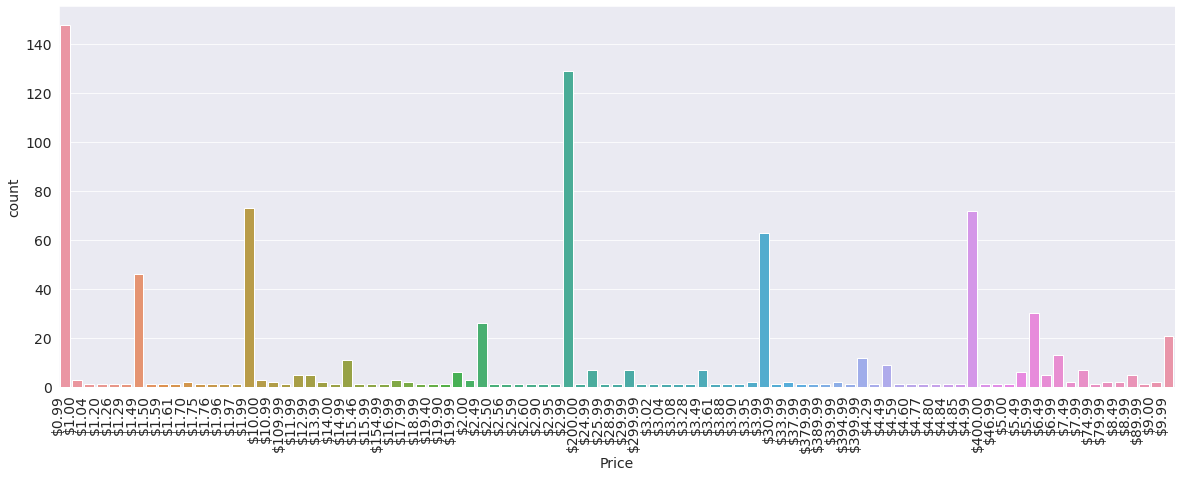

In [ ]:
plt.figure(figsize=(20, 7))
paid_apps_df = data[data['Type'] == 'Paid'].sort_values(by=['Price'],ascending=True)
plot_df = sns.countplot(paid_apps_df['Price'])
plot_df.set_xticklabels(plot_df.get_xticklabels(), rotation=90, ha="right")

**Using bar graph to show number of apps in different android version**

In [ ]:
data['Android_Ver'].unique()

array(['4.0.3_and_up', '4.2_and_up', '4.4_and_up', '2.3_and_up',
       '3.0_and_up', '4.1_and_up', '4.0_and_up', '2.3.3_and_up',
       '4.30_and_up', '2.2_and_up', '5.0_and_up', '6.0_and_up',
       '1.6_and_up', '1.5_and_up', '2.1_and_up', '7.0_and_up',
       '5.1_and_up', '4.3_and_up', '4.0.3-7.1.1', '2.0_and_up',
       '3.2_and_up', '4.4W_and_up', '7.1_and_up', '7.0-7.1.1',
       '8.0_and_up', '5.0-8.0', '3.1_and_up', '2.0.1_and_up', '4.1-7.1.1',
       '5.0-6.0', '1.0_and_up', '2.2-7.1.1', '5.0-7.1.1', nan],
      dtype=object)

In [ ]:
data['Android_Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
data['Android_Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
data['Android_Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
data['Android_Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
data['Android_Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
data['Android_Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
data['Android_Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
data['Android_Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
data['Android_Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
data['Android_Ver'].fillna('1.0', inplace=True)

Category        Android_Ver 
ART_AND_DESIGN  4.1_and_up      21
                4.0.3_and_up    16
                2.3_and_up       8
                4.0_and_up       7
                4.2_and_up       4
                                ..
WEATHER         4.2_and_up       2
                1.6_and_up       1
                2.3.3_and_up     1
                3.0_and_up       1
                4.3_and_up       1
Name: Android_Ver, Length: 529, dtype: int64


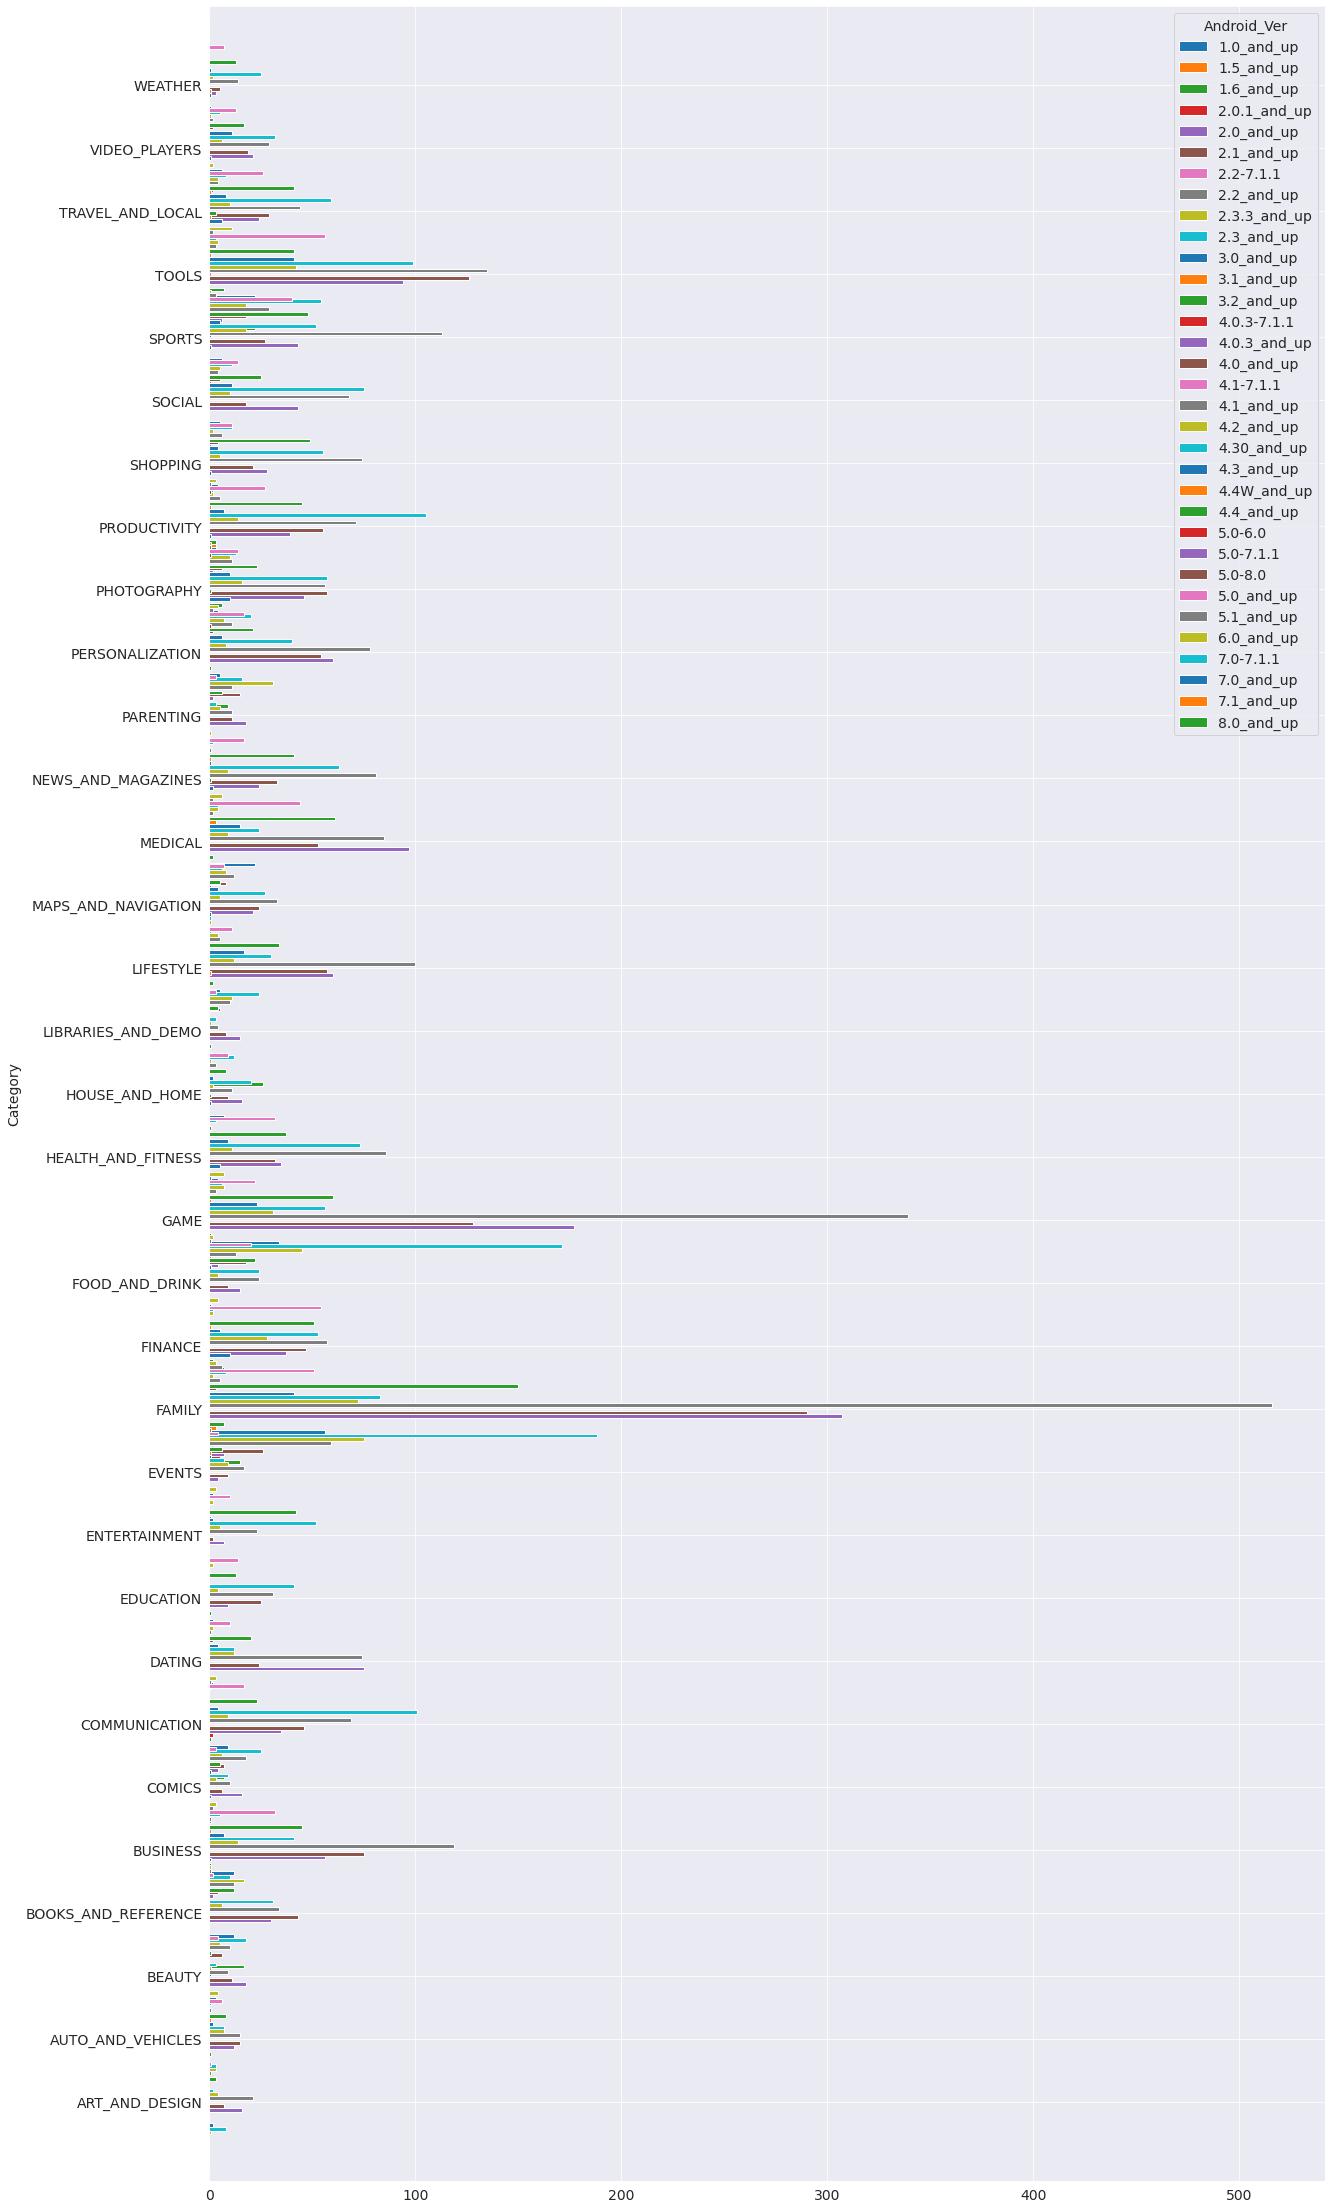

In [ ]:
print(data.groupby('Category')['Android_Ver'].value_counts())
Type_cat = data.groupby('Category')['Android_Ver'].value_counts().unstack().plot.barh(figsize=(20,40), width=2)
plt.show()

### **BY**

<h4><b><pre>
         NAME                                   ID
<hr>
<h4><b>CHATAKONDU VENKATA KALYAN BABU                       20181CSE0135
CHENNA LOHITH                                                                20181CSE0138
CHILUKALA TEJA VAMSHIDHAR REDDY                       20181CSE0147
KUSUMANJALI VEGI                                                          20181CSE0370
</pre></b></h4></b></h4>


<img  src="https://images.srkh.in/wp-content/uploads/2020/08/Professional-Thank-You-Images-for-PPT-Presentation-in-HD.jpg"></img>

